In [ ]:
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
path2 = ('mock_v2.nc')
#data1 = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
data = xr.open_dataset(path2) # To view time in datetime format
data
#data5['time']

/usr/local/lib/python3.7/dist-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:  (time: 20, lat: 10, lon: 10)
Dimensions without coordinates: time, lat, lon
Data variables:
    sst      (time, lat, lon) float64 ...
    t2m      (time, lat, lon) float64 ...

In [4]:
!pip install "dask[dataframe]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import dask.dataframe as dd

In [6]:
dask_df = data.to_dask_dataframe(dim_order=None, set_index=False)

In [7]:
dd = dask_df.compute()

In [9]:
# For mock data
sst_data_trans = pd.DataFrame()
t2m_data_trans = pd.DataFrame()
#v10_data_trans = pd.DataFrame()
#u10_data_trans = pd.DataFrame()
#sp_data_trans = pd.DataFrame()
#sshf_data_trans = pd.DataFrame()
#slhf_data_trans = pd.DataFrame()

for i in range(0,dd.shape[0]):
  b=('sst'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')
  c=('t2m'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')
  #d=('v10'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #e=('u10'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #f=('sp'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #g=('sshf'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #h=('slhf'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')

  sst_data_trans.loc[dd.time[i], b] = dd.sst[i]
  t2m_data_trans.loc[dd.time[i], c] = dd.t2m[i]
  #v10_data_trans.loc[dd.time[i], d] = dd.v10[i]
  #u10_data_trans.loc[dd.time[i], e] = dd.u10[i]
  #sp_data_trans.loc[dd.time[i], f] = dd.sp[i]
  #sshf_data_trans.loc[dd.time[i], g] = dd.sshf[i]
  #slhf_data_trans.loc[dd.time[i], h] = dd.slhf[i]


In [10]:
trans_concat = pd.concat([ t2m_data_trans, sst_data_trans ], axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
trans_concat_scaled = scaler.fit_transform(trans_concat)

# statistics of scaled data
pd.DataFrame(trans_concat_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,...,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(trans_concat_scaled)

KMeans(n_clusters=2)

In [13]:
# inertia on the fitted data
kmeans.inertia_

0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarni

Text(0, 0.5, 'Inertia')

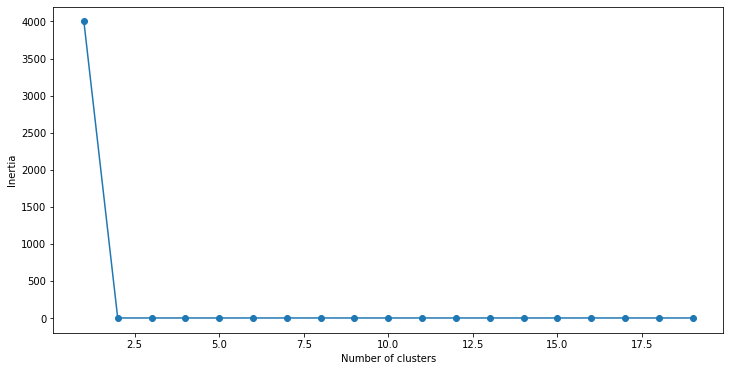

In [14]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(trans_concat_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [15]:


clustering = DBSCAN(eps=3, min_samples=2).fit(trans_concat_scaled)
clustering.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
frame = pd.DataFrame(trans_concat_scaled)
frame['cluster'] = clustering.labels_
frame['cluster'].value_counts()

0    10
1    10
Name: cluster, dtype: int64

In [23]:
silhouette_avg_n_clusters = []

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score


# k means using 2 clusters and k-means++ initialization
silhouette_avg = silhouette_score(trans_concat_scaled, clustering.labels_)

print("For n_clusters =",2, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 1.0
